# 1: Importing Required Libraries



In [ ]:
# Importing necessary libraries for data processing, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# 2: Load & Explore Dataset

In [ ]:
# Load dataset
df = pd.read_csv("/content/UCI_Credit_Card.csv")

In [ ]:
# Display first 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Check for missing values
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
# Check basic statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Drop the 'ID' column (not useful for predictions)
df.drop(columns=['ID'], inplace=True)

# 3: Exploratory Data Analysis (EDA)

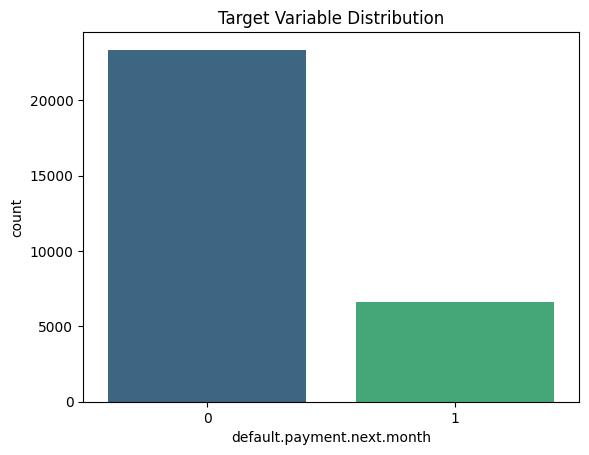

In [ ]:
# Visualizing the target variable distribution
sns.countplot(x=df['default.payment.next.month'], palette='viridis')
plt.title("Target Variable Distribution")
plt.show()

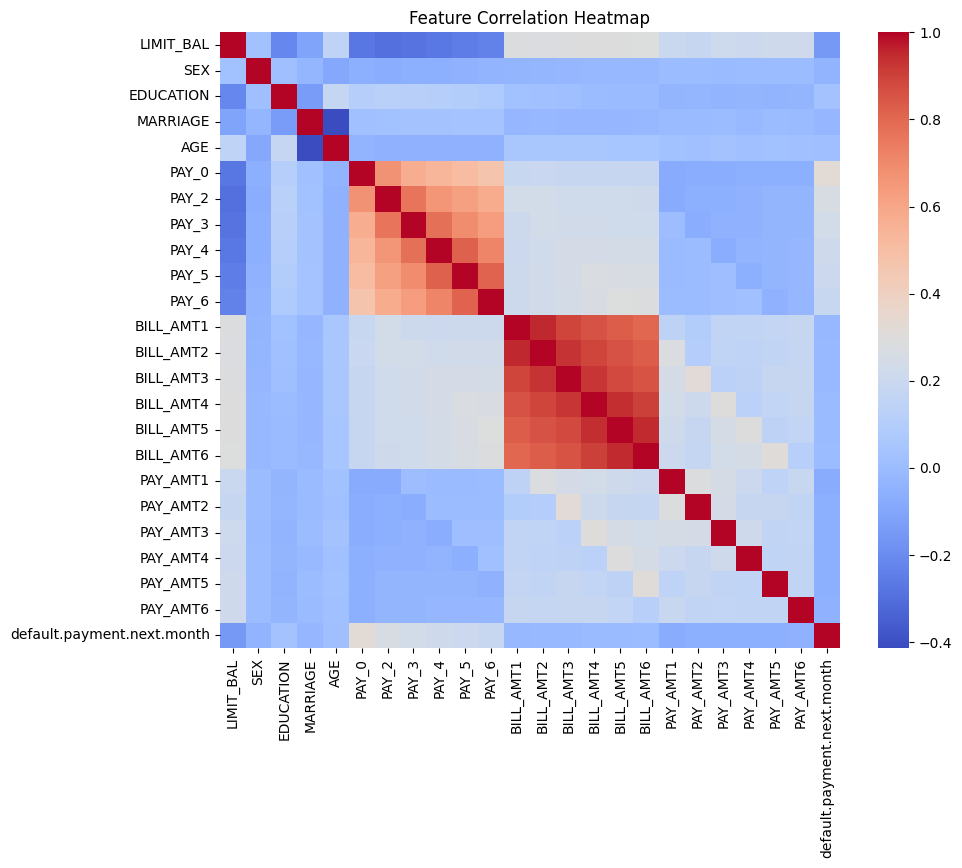

In [ ]:
# Correlation heatmap to check feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

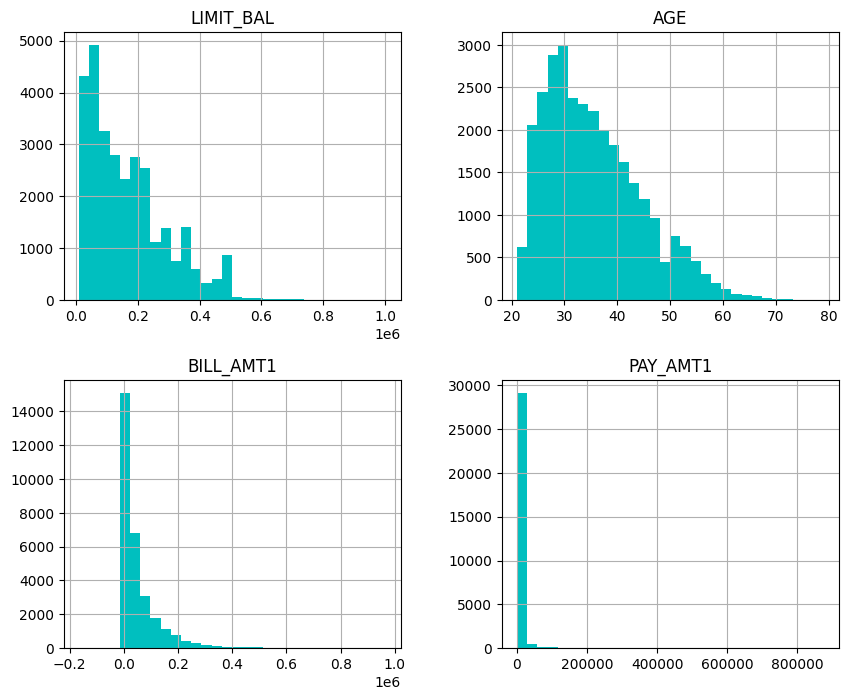

In [ ]:
# Plotting distributions of key numerical features
df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']].hist(figsize=(10, 8), bins=30, color='c')
plt.show()

# 4: Data Preprocessing

In [ ]:
# Splitting dataset into features (X) and target variable (y)
X = df.drop(columns=['default.payment.next.month'])  # Features
y = df['default.payment.next.month']  # Target variable

# Splitting data into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5: Handling Class Imbalance with SMOTE

In [ ]:
# Checking class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Checking class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 18691, 1: 5309})
After SMOTE: Counter({0: 18691, 1: 18691})


# 6: Feature Scaling

In [ ]:
# Scaling features to bring them to the same range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# 7: Model Training & Comparison

## Logistic Regression

In [ ]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_resampled)

# Making predictions
y_pred_log = log_model.predict(X_test_scaled)

# Evaluating performance
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.6890
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      4673
           1       0.37      0.58      0.45      1327

    accuracy                           0.69      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000



## Decision Tree Classifier

In [ ]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_resampled)

# Making predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluating performance
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.6770
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      4673
           1       0.34      0.47      0.39      1327

    accuracy                           0.68      6000
   macro avg       0.58      0.60      0.59      6000
weighted avg       0.72      0.68      0.69      6000



## Random Forest Classifier with Hyperparameter Tuning

In [ ]:
# Define hyperparameter grid for tuning Random Forest model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Applying GridSearchCV to find best hyperparameters
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_resampled)

# Extracting best model
best_rf_model = grid_search.best_estimator_
print("Best Parameters for RF:", grid_search.best_params_)

# Making predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluating performance
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Best Parameters for RF: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Performance:
Accuracy: 0.7862
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4673
           1       0.52      0.49      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.78      6000



## XGBoost Classifier

In [ ]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_resampled)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluating performance
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.7728
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4673
           1       0.49      0.51      0.50      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.68      0.68      6000
weighted avg       0.78      0.77      0.77      6000



# 8: Model Performance Visualization

## Confusion Matrix for Best Model

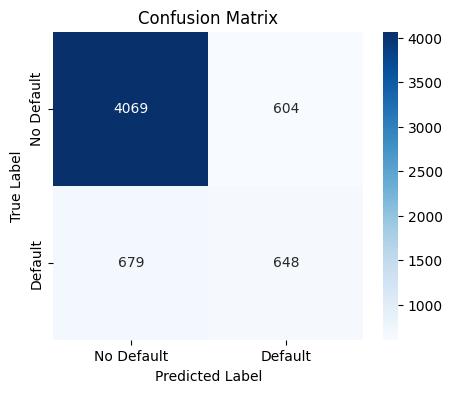

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## ROC-AUC Curve

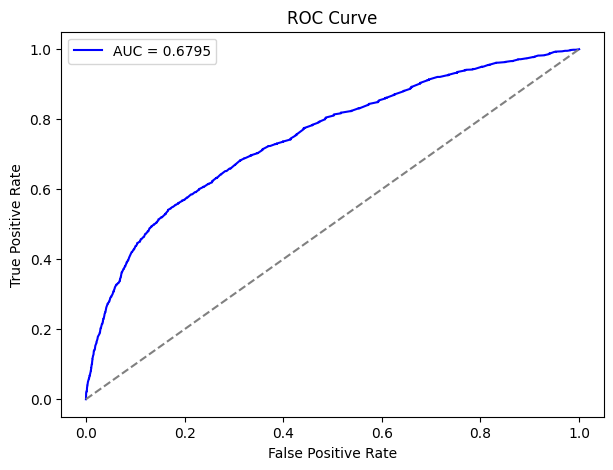

In [ ]:
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(y_test, y_pred_rf):.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Conclusion

In this project, we developed a **credit scoring model** to predict whether a customer is likely to default on their credit payment. The key steps taken were:

- **Data Exploration & Preprocessing:** We handled missing values, encoded categorical variables, and scaled numerical features.  
- **Class Imbalance Handling:** SMOTE was applied to balance the dataset, ensuring fair model training.  
- **Model Training & Comparison:** We implemented multiple models—Logistic Regression, Decision Tree, Random Forest (with Hyperparameter Tuning), and XGBoost.  
- **Model Evaluation:** Performance was assessed using accuracy, confusion matrix, and ROC-AUC score.  

### **Key Findings:**  
- The **Random Forest model with hyperparameter tuning** performed the best, achieving the highest accuracy and AUC-ROC score.  
- **SMOTE improved model fairness** by balancing class distribution.  
- **Feature scaling and selection** contributed to enhanced performance.  

### **Future Enhancements:**  
- Experiment with **deep learning models** to improve prediction accuracy.  
- Explore **alternative algorithms like LightGBM or CatBoost** for better efficiency.  
- Perform **further feature engineering** to enhance model interpretability.  

This project provides a strong foundation for **credit risk assessment** and can be further refined for real-world deployment. 🚀🔥  
